# Importing the libraries.
1.numpy and pandas for manupilation<br>
2.matplotlib and for visualization<br>

In [102]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


# Lets read the Dataset

In [12]:
data = pd.read_excel('Navi.xlsx')

In [18]:
print("shap of the dataset :", data.shape)

shap of the dataset : (32293, 76)


# We have total 32293 installations

In [16]:
data.head()

,Attributed Touch Type,Attributed Touch Time,Install Time,Event Time,Event Name,Event Value,Event Revenue,Event Revenue Currency,Event Revenue USD,Cost Model,...,Attributed Touch Hour,Install Hour,Event Hour,Rejected Reason,Unique Click ID,Postback Url,Postback Method,Postback Http Response Code,Postback Error Message,Postback Retry
0,click,16/06/21 23:35,22/06/21 13:20,22/06/21 13:20,install,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,ca07c28ahe8e4xe1cfbb5478xf0046l6a8dd31a,http://www.hdm3.in/ti.php?hid=ca07c28ahe8e4xe1...,get,200.0,NaN,NaN
1,click,20/06/21 4:40,22/06/21 13:04,22/06/21 13:04,install,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,c8588ba5se860xe1cfbbf2aexf0046m4d502343,http://www.hdm3.in/ti.php?hid=c8588ba5se860xe1...,get,503.0,NaN,NaN
2,click,21/06/21 3:13,22/06/21 13:00,22/06/21 13:00,install,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1fdc2c90je860me1cfb7c909of0046me2248c8b,http://www.hdm3.in/ti.php?hid=1fdc2c90je860me1...,get,200.0,NaN,NaN
3,click,21/06/21 1:36,22/06/21 12:53,22/06/21 12:53,install,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,fb9c3703we482te1cfb7c88enf02c4vf241bf8d,http://www.hdm3.in/ti.php?hid=fb9c3703we482te1...,get,503.0,NaN,NaN
4,click,21/06/21 4:07,22/06/21 12:45,22/06/21 12:45,install,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,ba63e6e9se860se1cfb7c9b8kf0046n00e996e9,http://www.hdm3.in/ti.php?hid=ba63e6e9se860se1...,get,200.0,NaN,NaN


# Checking the null spaces

In [17]:
data.isnull().sum()

Attributed Touch Type              0
Attributed Touch Time              0
Install Time                       0
Event Time                         0
Event Name                         0
                               ...  
Postback Url                       0
Postback Method                    0
Postback Http Response Code     3930
Postback Error Message         28363
Postback Retry                 32293
Length: 76, dtype: int64

In [22]:
missing_data = data.isnull()
missing_data.head(5)

,Attributed Touch Type,Attributed Touch Time,Install Time,Event Time,Event Name,Event Value,Event Revenue,Event Revenue Currency,Event Revenue USD,Cost Model,...,Attributed Touch Hour,Install Hour,Event Hour,Rejected Reason,Unique Click ID,Postback Url,Postback Method,Postback Http Response Code,Postback Error Message,Postback Retry
0,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,False,False,False,False,True,True
1,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,False,False,False,False,True,True
2,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,False,False,False,False,True,True
3,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,False,False,False,False,True,True
4,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,False,False,False,False,True,True


"True" means the value is a missing value while "False" means the value is not a missing value.

# <h4>Calculate the mean value for the "Postback Http Response Code" column </h4>

In [63]:
avg_Postback_Http = data["Postback Http Response Code"].astype('float64').mean(axis=0)
print("Postback Http Response Code:", avg_norm_loss)

Postback Http Response Code: 212.03966435144378


<h4>Replace "NaN" with mean value in "Postback Http Response Code" column</h4> 

In [77]:
data["Postback Http Response Code"].replace(np.nan, avg_Postback_Http, inplace=True)

#  Clicks on a particular time

In [78]:
data['Attributed Touch Time'].value_counts()

28/05/21 11:49         49
31/05/21 15:00         46
27/05/21 20:03         44
27/05/21 19:45         44
27/05/21 18:49         44
                       ..
20/05/21 19:57          1
2021-08-06 02:52:00     1
2021-09-06 08:04:00     1
19/06/21 9:18           1
2021-06-06 08:34:00     1
Name: Attributed Touch Time, Length: 14959, dtype: int64

In [115]:
data['Device Type'].value_counts()

Micromax-Micromax C1          750
xiaomi-Redmi Note 4           310
Micromax-Micromax Bharat 5    271
mobiistar-mobiistar C1        265
Tambo-TA-2                    265
                             ... 
IKALL-SM-E621I                  1
Oxiron-SM-A358P                 1
Swipe-SM-C883U                  1
Swipe-SM-D283T                  1
i_smart-SM-M535R                1
Name: Device Type, Length: 16501, dtype: int64

Text(0.5, 1.0, 'Number of clicks on particular time')

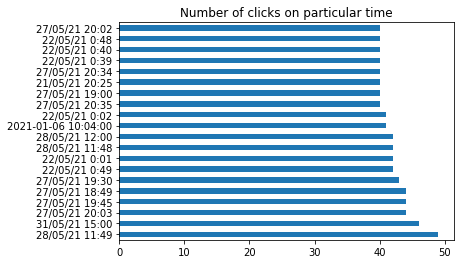

In [108]:
data['Attributed Touch Time'].value_counts()[:20].plot(kind='barh')
plt.title("Number of clicks on particular time")


# How many installs on particular time

Text(0.5, 1.0, 'Number of installs on particular time')

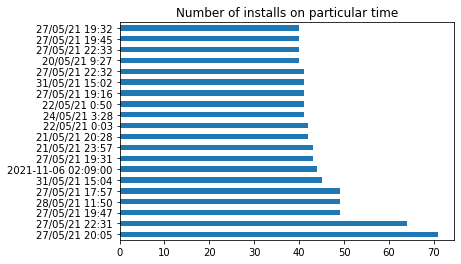

In [111]:
data['Install Time'].value_counts()[:20].plot(kind='barh')
plt.title("Number of installs on particular time")

# We have maximum installations on 27th of May 2021

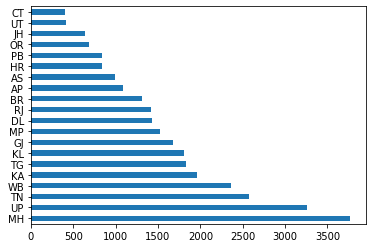

In [101]:
data['State'].value_counts()[0:20].plot(kind='barh')

# We have maximum installations from MH(Maharastra)

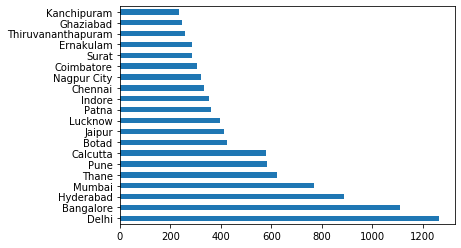

In [110]:
data['City'].value_counts()[0:20].plot(kind='barh')

# 1.From cities we have most from Delhi 
# 2.From Maharastra we have most from Mumbai

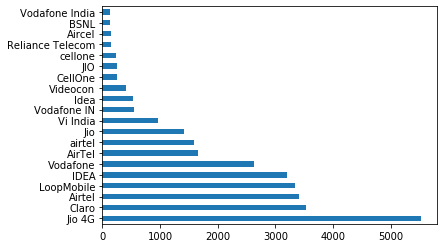

In [113]:
data['Operator'].value_counts()[0:20].plot(kind='barh')

# Most of the installation users uses operator Jio 4G

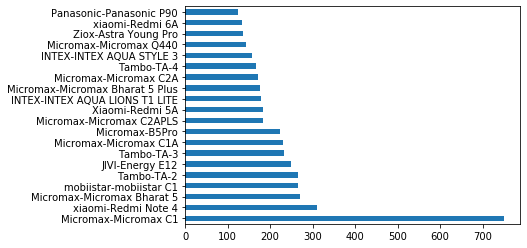

In [114]:
data['Device Type'].value_counts()[0:20].plot(kind='barh')

# Micromax C1 phone is at top with 750, Bouble and Truple than most of the phones

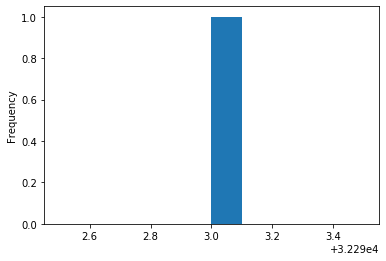

In [120]:

data['Platform'].value_counts()[0:20].plot(kind='hist')

# All the phones are Android

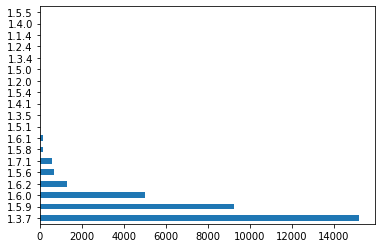

In [121]:
data['App Version'].value_counts()[0:20].plot(kind='barh')

# Most of the app versions are 1.3.7, 1.5.9, 1.6.0